In [1]:
import simpy
from outputs.run_definition import run_definition 
import outputs.process_class as pc
from outputs.utils import process_path_probability
import pickle
import pandas as pd
import pm4py

env = simpy.Environment()

with open('outputs/data/variants.pkl', 'rb') as f:
     variants = pickle.load(f)


process_scenario_object = pc.process_definition(env)
process_path_probabilities = process_path_probability(variants).run()
event_log = process_scenario_object.log_list

with open('outputs/data/log_sim.pkl', 'wb') as f:
     pickle.dump(event_log, f)

    
env.process(run_definition(env, process_scenario_object,  process_path_probabilities))
env.run(500)

log_sim_pm = pd.DataFrame(event_log, columns = ['entity' , 'event_time', 'activity'])
log_pm = pm4py.format_dataframe(log_sim_pm, case_id = 'entity', activity_key = 'activity', timestamp_key = 'event_time')

In [2]:
process_mode = pm4py.discover_bpmn_inductive(log_pm)

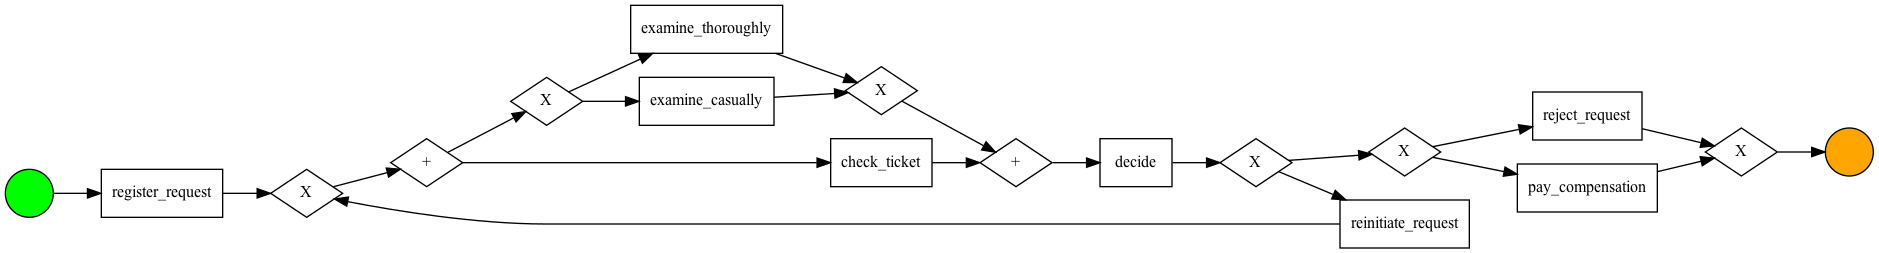

In [3]:
diagram = pm4py.view_bpmn(process_mode)